# Introduction to Python for Machine Learning (v 4.0)

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import re
import os

## 2. Import Dataset

#### 2.1. Create Directories and URL

In [2]:
# Create url
url = 'http://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'

# variable to store file path
file_path = r'DataSets'

# variable to store file name
file_name = 'fuel_dataset.xlsx'

# variable to store file directory
file_directory = file_path+"\\"+file_name

# string variable to store sheet name
excel_sheet = 'DataSet'

# Create file directory
os.makedirs(os.path.dirname(file_directory), exist_ok=True)

#### 2.2. Import DataSet to Local directory

In [3]:
try: # try load from file
    raw_df = pd.read_excel(file_directory, excel_sheet)
    print("Fuel DataSet Loaded!")
except FileNotFoundError: 
    try: # try download data set from git repo
        raw_df = pd.read_csv(url)
        # Save to local storage
        raw_df.to_excel(file_directory, excel_sheet, index=False) 
        print("File downloaded!") 
    except OSError: 
        print('Network Connection Error!')

Fuel DataSet Loaded!


## 3. Data Exploration 
###### -> Here we would try to understand our dataset

#### 3.1. Display the data set

In [4]:
# print first 4 rows
print(raw_df.head(3))

                record_id  utility_id_ferc1  report_year  \
0   f1_fuel_1994_12_1_0_7                 1         1994   
1  f1_fuel_1994_12_1_0_10                 1         1994   
2   f1_fuel_1994_12_2_0_1                 2         1994   

       plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
0              rockport                coal       ton          5377489   
1  rockport total plant                coal       ton         10486945   
2                gorgas                coal       ton          2978683   

   fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
0               16.590                      18.59   
1               16.592                      18.58   
2               24.130                      39.72   

   fuel_cost_per_unit_delivered  fuel_cost_per_mmbtu  
0                         18.53                1.121  
1                         18.53                1.120  
2                         38.12                1.650  


#### 3.2. Display dataset info

In [5]:
# Get data set info
print(raw_df.info(verbose=True, null_counts=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   record_id                     object 
 1   utility_id_ferc1              int64  
 2   report_year                   int64  
 3   plant_name_ferc1              object 
 4   fuel_type_code_pudl           object 
 5   fuel_unit                     object 
 6   fuel_qty_burned               int64  
 7   fuel_mmbtu_per_unit           float64
 8   fuel_cost_per_unit_burned     float64
 9   fuel_cost_per_unit_delivered  float64
 10  fuel_cost_per_mmbtu           float64
dtypes: float64(4), int64(3), object(4)
memory usage: 2.5+ MB
None


#### 3.3. Describe the data set to understand the relations, dependencies, frequencies and unique features

In [6]:
# describe dataset
print(raw_df.describe(include = 'all'))

                      record_id  utility_id_ferc1   report_year  \
count                     29523      29523.000000  29523.000000   
unique                    29523               NaN           NaN   
top     f1_fuel_2008_12_134_0_5               NaN           NaN   
freq                          1               NaN           NaN   
mean                        NaN        118.601836   2005.806050   
std                         NaN         74.178353      7.025483   
min                         NaN          1.000000   1994.000000   
25%                         NaN         55.000000   2000.000000   
50%                         NaN        122.000000   2006.000000   
75%                         NaN        176.000000   2012.000000   
max                         NaN        514.000000   2018.000000   

       plant_name_ferc1 fuel_type_code_pudl fuel_unit  fuel_qty_burned  \
count             29523               29523     29343     2.952300e+04   
unique             2315                   6    

#### 3.4. Check Are there null values (how many)?

In [7]:
# Check for null values in dataset
print(raw_df.isna().sum())

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64


#### 3.5. What correlations do this data set have?
###### -> This would enable us to understand how closely related some features are.

In [8]:
# Check data correlation
print(raw_df.corr())

                              utility_id_ferc1  report_year  fuel_qty_burned  \
utility_id_ferc1                      1.000000     0.093323        -0.057447   
report_year                           0.093323     1.000000         0.012952   
fuel_qty_burned                      -0.057447     0.012952         1.000000   
fuel_mmbtu_per_unit                  -0.066946    -0.110853        -0.080946   
fuel_cost_per_unit_burned            -0.037863     0.013599        -0.018535   
fuel_cost_per_unit_delivered         -0.016414    -0.014043        -0.003551   
fuel_cost_per_mmbtu                   0.006122     0.010261        -0.001896   

                              fuel_mmbtu_per_unit  fuel_cost_per_unit_burned  \
utility_id_ferc1                        -0.066946                  -0.037863   
report_year                             -0.110853                   0.013599   
fuel_qty_burned                         -0.080946                  -0.018535   
fuel_mmbtu_per_unit                    

In [9]:
"""-> The most correlation was between the 'report_year' and the 'utility_id_ferc1', while the least correlation was between the 'fuel_mmbtu_per_unit' and the 'report_year'.
There is a huge disjoint here, why?"""

"-> The most correlation was between the 'report_year' and the 'utility_id_ferc1', while the least correlation was between the 'fuel_mmbtu_per_unit' and the 'report_year'.\nThere is a huge disjoint here, why?"

#### 3.7. Plot a scatter diagram shwoing the distribution on column 7 and 8

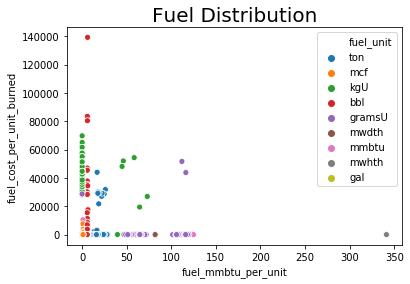

In [10]:
def plot_scatter(x,y,h,df):
    sns.scatterplot(x=x,y=y,hue=h,data=df) 
    plt.title('Fuel Distribution',size = 20)
    plt.savefig(file_path+"\\"+'Scatter_plot'+".png")
    plt.show()

# show data distribution
plot_scatter('fuel_mmbtu_per_unit','fuel_cost_per_unit_burned','fuel_unit',raw_df)

## 4. Data Cleaning and Data Wrangling

###### -> This is section is divided into Tasks:

#### 4.1. Task 1: Clean columns = 'plant_name_ferc1'

In [11]:
# display rows column = 'plant_name_ferc1' before cleaning
print(raw_df['plant_name_ferc1'].head(5)) 

0                rockport
1    rockport total plant
2                  gorgas
3                   barry
4               chickasaw
Name: plant_name_ferc1, dtype: object


In [12]:
# function to remove characters such as #,*,(,),&,. from the strings & cluster them together which
# would improve uniqueness of the plant names
def clean_string(string):  
    return string.translate({ord(c): '' for c in '.#*$&()'}) 

In [13]:
# apply function to columns='plant_name_ferc1' to remove characters
raw_df['plant_name_ferc1'] = raw_df['plant_name_ferc1'].apply(lambda x: clean_string(x))

In [14]:
# check the first 10 names 
print(raw_df['plant_name_ferc1'].head(10))

0                rockport
1    rockport total plant
2                  gorgas
3                   barry
4               chickasaw
5       e c gaston-unit 5
6         joseph m farley
7     resondent's portion
8    respondent's portion
9               units 1-3
Name: plant_name_ferc1, dtype: object


In [15]:
# check for key words like 'plant','total','power'
raw_df.loc[raw_df['plant_name_ferc1'].str.contains('plant|total|power', regex=True)]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.580,18.530,1.12000
16,f1_fuel_1994_12_6_0_7,6,1994,amos-total,coal,ton,5327281,24.538,44.312,42.940,1.80600
89,f1_fuel_1994_12_12_0_11,12,1994,osage plant,coal,ton,205675,16.010,14.720,14.300,0.91900
90,f1_fuel_1994_12_12_0_14,12,1994,wyodak plant,coal,ton,391234,15.896,10.100,9.670,0.63500
173,f1_fuel_1994_12_44_0_2,44,1994,belle river total,coal,ton,4996518,18.706,27.620,27.620,1.47600
...,...,...,...,...,...,...,...,...,...,...,...
29475,f1_fuel_2018_12_193_1_1,193,2018,presque isle-total,coal,ton,1029238,18.024,42.557,42.557,2.36112
29476,f1_fuel_2018_12_193_1_5,193,2018,pt washington-total,gas,mcf,39905100,1.010,3.211,3.211,3.18960
29479,f1_fuel_2018_12_193_1_10,193,2018,so oak creek-total,coal,ton,2784916,17.568,36.526,36.526,2.07912
29480,f1_fuel_2018_12_193_1_12,193,2018,so oak creek-total,gas,mcf,358934,1.010,3.475,3.475,3.43815


In [16]:
# remove words such as 'plant','power','total' to improve uniqueness|similarity of plant names
def remove_substrings():
    x_strings = ['plant','power','total','ttl','plt']
    return lambda x: ' '.join([word for word in x.split() if word not in x_strings])

# apply to column = 'plant_name_ferc1'
raw_df['plant_name_ferc1'] = raw_df['plant_name_ferc1'].apply(remove_substrings())

In [17]:
# display first 5 rows in the column = 'plant_name_ferc1' after cleaning
print(raw_df['plant_name_ferc1'].head(50))

0                 rockport
1                 rockport
2                   gorgas
3                    barry
4                chickasaw
5        e c gaston-unit 5
6          joseph m farley
7      resondent's portion
8     respondent's portion
9                units 1-3
10               units 1-3
11                  unit 4
12                  unit 4
13            clinch river
14            clinch river
15         amos-apco share
16              amos-total
17                glen lyn
18           kanawha river
19           kanawha river
20               mountainr
21               mountainr
22       philip sporn-apco
23       philip sporn-apco
24            philip sporn
25            philip sporn
26      cholla units 1,2,3
27      cholla units 1,2,3
28      cholla units 1,2,3
29               4 corners
30               4 corners
31               4 corners
32               4 corners
33             ocotillo 12
34        saguaro units 12
35        saguaro units 12
36                 yucca 1
3

In [18]:
# replace white spaces with with an unders score
raw_df['plant_name_ferc1'] = raw_df['plant_name_ferc1'].replace([',','-',' '],'_',regex=True)

#display first 5 rows of dataframe
raw_df.head(50)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590000,18.590,18.530,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945,16.592000,18.580,18.530,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130000,39.720,38.120,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950000,47.210,45.990,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000000,2.770,2.770,2.570
5,f1_fuel_1994_12_2_0_13,2,1994,e_c_gaston_unit_5,coal,ton,2124933,23.922000,44.240,43.250,1.850
6,f1_fuel_1994_12_2_1_1,2,1994,joseph_m_farley,nuclear,kgU,2260,0.064094,28.770,0.000,0.450
7,f1_fuel_1994_12_2_1_10,2,1994,resondent's_portion,coal,ton,5372133,24.840000,58.540,55.130,2.360
8,f1_fuel_1994_12_2_2_10,2,1994,respondent's_portion,coal,ton,817520,24.290000,33.970,34.650,1.400
9,f1_fuel_1994_12_4_0_1,4,1994,units_1_3,coal,ton,1471233,22.484000,28.730,28.110,1.278


#### 4.2. Task 2: Remove null values in column = 'fuel_unit'

In [19]:
# display null values contained in the data set
print(raw_df.isnull().sum())

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64


In [20]:
# check the number of occurence of each fuel unit grouped by fuel types
print(raw_df.groupby('fuel_type_code_pudl')['fuel_unit'].value_counts())

fuel_type_code_pudl  fuel_unit
coal                 ton           8438
                     mmbtu           52
                     mcf              5
                     bbl              1
gas                  mcf          11333
                     mmbtu           94
                     ton              4
                     bbl              2
nuclear              gramsU         464
                     kgU            110
                     mwhth          100
                     mwdth           95
                     mmbtu           34
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                ton             77
                     bbl             42
                     mcf              9
                     gal              3
waste                ton            436
                     bbl              1
Name: fuel_unit, dtype: int64


###### -> Select the most frequent fuel unit in each group

In [21]:
# create variables of list and dataframe types
fuel_unit_list = []
fuel_type_df   = pd.DataFrame()

# store the unique fuel types as a list
fuel_type_list = raw_df['fuel_type_code_pudl'].unique()

# loop through the fuel types and append to selected fuel units in each group  
# Please note: these fuel units where selected by their frequency|count of appearance. the 
# most occurring are the selected units to be taken.
for fuel_type in fuel_type_list:
    fuel_unit_list.append(raw_df.loc[raw_df['fuel_type_code_pudl']==fuel_type,'fuel_unit'].mode())

# fill the dataframe 'fuel_type_df' with the fuel_type_list and fuel_unit_list   
fuel_type_df['Fuel Types'] = fuel_type_list
fuel_type_df['Fuel Units'] = pd.DataFrame(fuel_unit_list)

# print out dataframe of selected fuel units for each fuel type
print(fuel_type_df)

  Fuel Types Fuel Units
0       coal        ton
1        gas        mcf
2    nuclear     gramsU
3        oil        bbl
4      waste        ton
5      other        ton


In [22]:
# remove null values from column='fuel_unit' by grouping column='fuel_type_code_pudl'
for index,fuel_type in fuel_type_df.iterrows():
    raw_df.loc[raw_df['fuel_type_code_pudl']==fuel_type['Fuel Types'],'fuel_unit'] = raw_df.loc[raw_df['fuel_type_code_pudl']==fuel_type['Fuel Types'],'fuel_unit'].fillna(value=fuel_type['Fuel Units'])

# print out null values of dataframe if any
print(raw_df.isnull().sum())

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64


#### 4.3. Task 3: Fill the rows containing '0' in column = 'fuel_cost_per_unit_delivered'

In [23]:
# Check for zero values in column
raw_df.loc[raw_df['fuel_cost_per_unit_delivered'] == 0]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
6,f1_fuel_1994_12_2_1_1,2,1994,joseph_m_farley,nuclear,kgU,2260,0.064094,28.770,0.0,0.450
52,f1_fuel_1994_12_9_0_8,9,1994,pch_bt_23,nuclear,gramsU,204246,0.000065,44.000,0.0,0.679
53,f1_fuel_1994_12_9_0_11,9,1994,salem_1_2,nuclear,gramsU,139013,0.000066,41.310,0.0,0.623
54,f1_fuel_1994_12_9_0_14,9,1994,hope_ck_1,nuclear,gramsU,61570,0.000062,37.510,0.0,0.603
69,f1_fuel_1994_12_10_0_1,10,1994,calvert_cliffs,nuclear,gramsU,1573622,0.076936,38.070,0.0,0.500
...,...,...,...,...,...,...,...,...,...,...,...
29364,f1_fuel_2018_12_163_0_11,163,2018,ab_brown_turbine_3,oil,gal,1953,5.778000,110.040,0.0,19.045
29499,f1_fuel_2018_12_191_1_3,191,2018,hutchinson,oil,bbl,527,5.816407,102.110,0.0,17.556
29500,f1_fuel_2018_12_191_1_6,191,2018,hutchinson_w/diesel,oil,bbl,36,5.795044,102.488,0.0,17.685
29514,f1_fuel_2018_12_12_0_4,12,2018,ben_french_station,oil,bbl,487,5.831070,0.000,0.0,9.970


In [24]:
# Mask all the values in column = 'fuel_per_unit_cost_delivered' containing zero 
# value with the relative value on column = 'fuel_per_unit_cost_burned', since the 
# correlation between the columns is high. There can't be burnt fuel without delivery
df1 = raw_df['fuel_cost_per_unit_delivered']
df2 = raw_df['fuel_cost_per_unit_burned']

# mask column to fill rows containing zeros 
raw_df['fuel_cost_per_unit_delivered'] = df1.mask(df1==0, df2)

# check
raw_df.loc[raw_df['fuel_cost_per_unit_delivered'] == 0]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
211,f1_fuel_1994_12_38_0_1,38,1994,connecticut_yankee,nuclear,gramsU,652000,0.000006,0.0,0.0,0.000
670,f1_fuel_1994_12_146_1_13,146,1994,millstone_no_3,nuclear,gramsU,43006,0.000006,0.0,0.0,0.000
671,f1_fuel_1994_12_118_0_1,118,1994,seabrook,nuclear,gramsU,361764,0.000006,0.0,0.0,0.000
786,f1_fuel_1994_12_179_0_1,179,1994,seabrook,nuclear,gramsU,177986,0.000006,0.0,0.0,0.000
790,f1_fuel_1994_12_179_0_13,179,1994,millstone___unit_3,nuclear,gramsU,55655,0.000006,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
28941,f1_fuel_2018_12_134_1_8,134,2018,hunter_unit_no_3,oil,bbl,12340,5.796000,0.0,0.0,17.796
29177,f1_fuel_2018_12_120_0_11,120,2018,prairie_island,nuclear,gramsU,849683,0.111007,0.0,0.0,0.808
29187,f1_fuel_2018_12_120_1_14,120,2018,monticello,nuclear,gramsU,474307,0.124409,0.0,0.0,0.787
29514,f1_fuel_2018_12_12_0_4,12,2018,ben_french_station,oil,bbl,487,5.831070,0.0,0.0,9.970


###### -> from our observation we noticed that the zero values remaining are values which is equal to that of the 'fuel_cost_per_unit_burnt' column. 
###### -> The question is, can there be energy measured when no fuel was delivered and burnt?

#### 4.4. Task 4: Drop all rows containing outliers and zero value in both column 8 and 9

In [25]:
# remove columns with zero values in column
raw_df = raw_df.loc[(raw_df['fuel_cost_per_unit_burned'] != 0) & (raw_df['fuel_cost_per_unit_delivered'] != 0)]

# check
raw_df.loc[raw_df['fuel_cost_per_unit_delivered'] == 0]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu


In [26]:
# remove the first 5 categorical columns
def remove_outliers(df):
    filt_df = df.iloc[:,6:11]
    
    # compute the percentiles
    low  = .05
    high = .95
    quant_df = filt_df.quantile([low,high])
    # print(quant_df)
    
    # filter values based on the computed quantiles|percentiles
    filt_df = filt_df.apply(lambda x: x[(x >= quant_df.loc[low,x.name]) & (x <= quant_df.loc[high,x.name])],axis=0)
    # concatenate the two dataframes to form a whole dataframe
    filt_df = pd.concat([df.iloc[:,0:6],filt_df],axis=1)
    # drop rows with NaN values
    filt_df.dropna(inplace=True)
    # return dataframe
    return filt_df

In [27]:
# filtered outliers from dataframe
raw_df = remove_outliers(raw_df)

# describe
print(raw_df.describe())

       utility_id_ferc1   report_year  fuel_qty_burned  fuel_mmbtu_per_unit  \
count      20315.000000  20315.000000     2.031500e+04         20315.000000   
mean         119.438395   2006.197736     1.190490e+06             8.408812   
std           73.954814      6.758200     2.159183e+06             8.450763   
min            1.000000   1994.000000     4.900000e+02             0.992000   
25%           55.000000   2001.000000     1.968650e+04             1.025011   
50%          127.000000   2006.000000     2.637690e+05             5.793900   
75%          177.000000   2012.000000     1.301698e+06            17.300000   
max          514.000000   2018.000000     1.322618e+07            24.672000   

       fuel_cost_per_unit_burned  fuel_cost_per_unit_delivered  \
count               20315.000000                   20315.00000   
mean                   30.395572                      30.38069   
std                    28.244785                      28.67697   
min                     

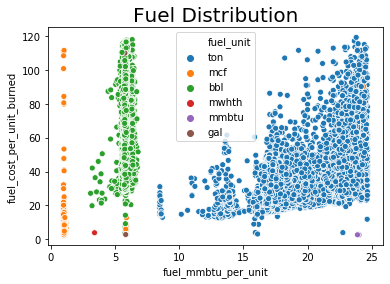

In [28]:
# show data distribution after cleaning outliers
plot_scatter('fuel_mmbtu_per_unit','fuel_cost_per_unit_burned','fuel_unit',raw_df)

#### 4.5. Check and drop duplicates then reset index 

In [29]:
# Check for duplicates
if raw_df.duplicated().sum() > 0:
    raw_df.drop_duplicates(inplace=True)

raw_df.reset_index(drop=True)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
20310,f1_fuel_2018_12_12_0_8,12,2018,neil_simpson_unit_2,coal,ton,491913.0,16.100,14.76,17.72,1.100
20311,f1_fuel_2018_12_12_0_13,12,2018,neil_simpson_ct_1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
20312,f1_fuel_2018_12_12_1_1,12,2018,cheyenne_prairie_58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
20313,f1_fuel_2018_12_12_1_10,12,2018,lange_ct_facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990


#### 4.6. Save the filtered dataset

In [30]:
# save filtered data frame to file
raw_df.to_excel(file_path+"\\"+'filtered.xlsx','Modified sheet',index=False)

#### 4.7. Augument dataframe with extra columns and save augumented dataframe to file

In [31]:
# add the fuel cost burnt column for determining the total cost of burning 
raw_df['energy_kWH_per_unit'] = raw_df['fuel_mmbtu_per_unit'] / 0.003412

# add the fuel-to-energy cost column
raw_df['fuel_to_energy_cost'] = raw_df['fuel_mmbtu_per_unit'] * raw_df['fuel_cost_per_mmbtu']

# print to display
print(raw_df.head(3))

                record_id  utility_id_ferc1  report_year plant_name_ferc1  \
0   f1_fuel_1994_12_1_0_7                 1         1994         rockport   
1  f1_fuel_1994_12_1_0_10                 1         1994         rockport   
2   f1_fuel_1994_12_2_0_1                 2         1994           gorgas   

  fuel_type_code_pudl fuel_unit  fuel_qty_burned  fuel_mmbtu_per_unit  \
0                coal       ton        5377489.0               16.590   
1                coal       ton       10486945.0               16.592   
2                coal       ton        2978683.0               24.130   

   fuel_cost_per_unit_burned  fuel_cost_per_unit_delivered  \
0                      18.59                         18.53   
1                      18.58                         18.53   
2                      39.72                         38.12   

   fuel_cost_per_mmbtu  energy_kWH_per_unit  fuel_to_energy_cost  
0                1.121          4862.250879             18.59739  
1              

In [32]:
# Save modified dataframe to file
raw_df.to_excel(file_path+"\\"+'Augumented.xlsx','Modified sheet',index=False)

## 5. Data Visualization

#### 5.1. What year was the best performing year?

             fuel_mmbtu_per_unit
report_year                     
1994                   11.329085
1995                   13.410359
1996                    9.918742
1997                    8.876847
1998                   10.113758
1999                    9.439941
2000                    7.732156
2001                    7.687571
2002                    7.613978
2003                    7.477960
2004                    7.983822
2005                    7.888816
2006                    8.061024
2007                    8.078851
2008                    8.670753
2009                    8.255818
2010                    7.706621
2011                    8.512500
2012                    8.855513
2013                    8.678741
2014                    8.506796
2015                    7.806995
2016                    7.241830
2017                    7.189813
2018                    7.308197


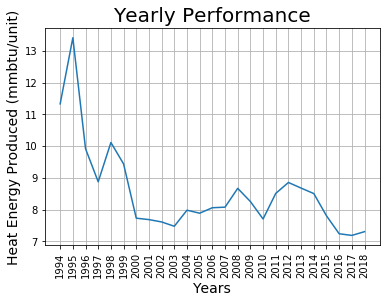

In [33]:
result = raw_df.groupby(['report_year']).mean()

# print to display
print(result[['fuel_mmbtu_per_unit']])

# plot a line graph to show the overall yearly performance in production
result['fuel_mmbtu_per_unit'].plot()
plt.ylabel('Heat Energy Produced (mmbtu/unit)', size=14)
plt.xlabel('Years',size = 14)
plt.xticks(result.index, rotation=90)
plt.title('Yearly Performance',size=20)
plt.savefig(file_path+"\\"+'Yearly Performance'+".png")

plt.grid()

plt.show()

#### 5.2. Which utilities are the best and worst performing?

                  fuel_mmbtu_per_unit  fuel_to_energy_cost
utility_id_ferc1                                          
1                           12.593554            43.195114
2                           20.527300            58.165863
4                           16.103000            20.313130
6                           15.205745            51.507303
7                            6.153491            20.558142
...                               ...                  ...
449                         14.408124            56.942714
452                         20.488489            57.906676
454                          5.690961            39.076701
513                          1.032000             5.902008
514                         17.559000            33.818570

[170 rows x 2 columns]


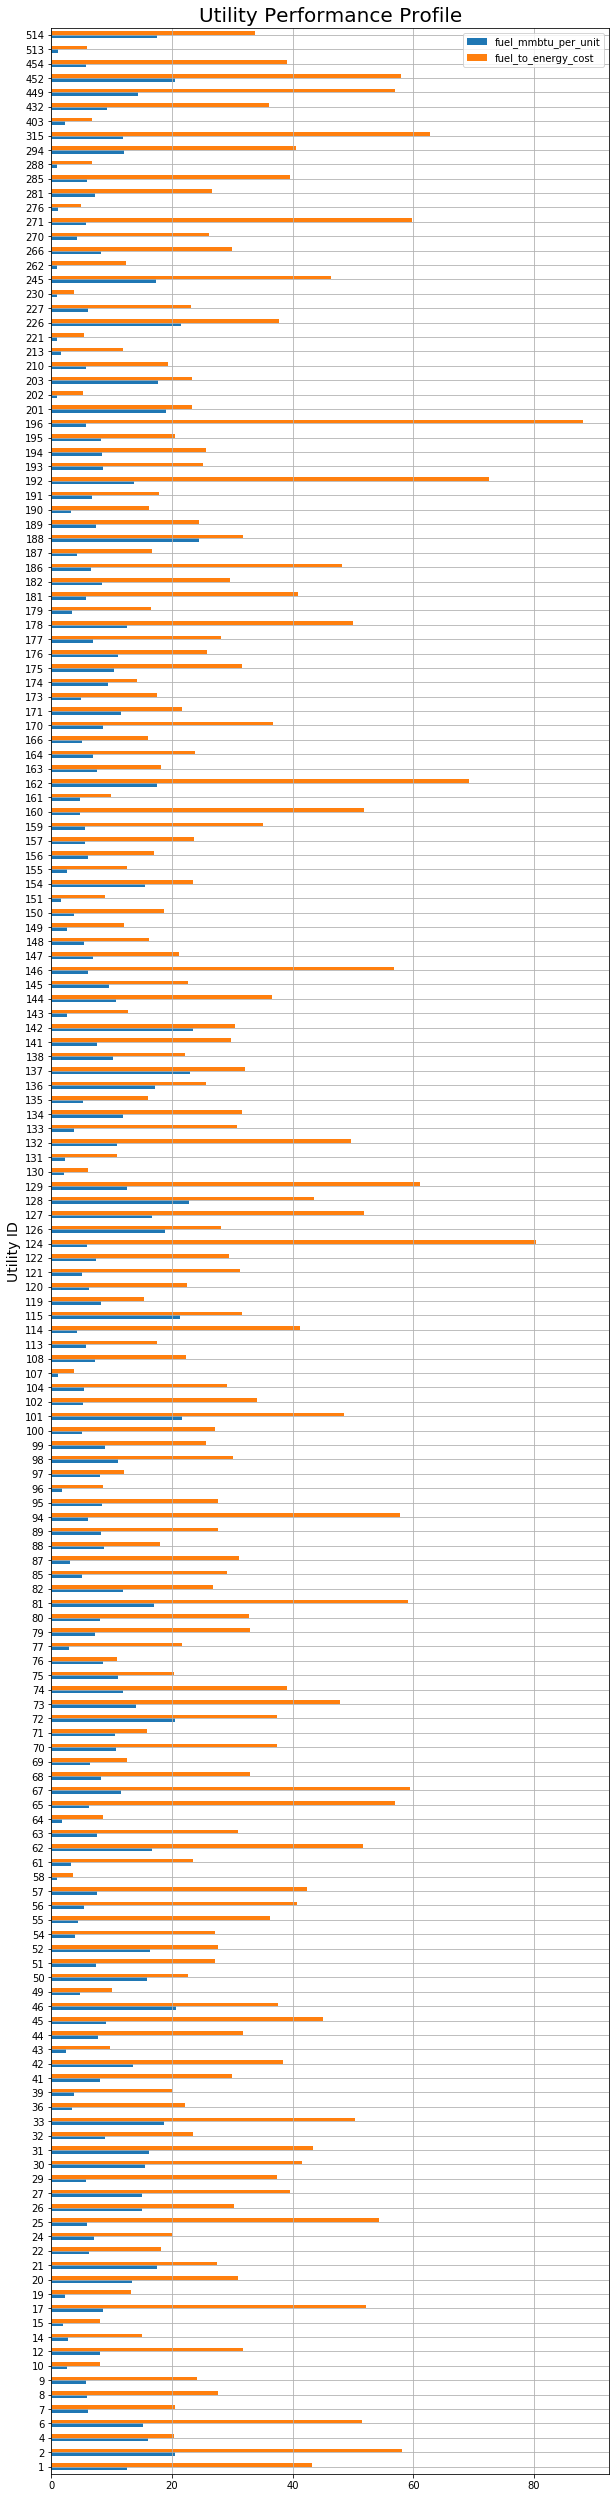

In [34]:
# group data by utility id(s)
result = raw_df.groupby('utility_id_ferc1').mean()

# display values for comparison
print(result[['fuel_mmbtu_per_unit','fuel_to_energy_cost']])

# plot graph to show comparison
result[['fuel_mmbtu_per_unit','fuel_to_energy_cost']].plot.barh(figsize=(10,45))
plt.title('Utility Performance Profile', size = 20)
plt.ylabel('Utility ID',size = 14)
plt.savefig(file_path+"\\"+'Utility Performance Profile'+".png")
plt.grid()

plt.show()

#### 5.2. What fuel was the most effecient 

In [40]:
def draw_groupedBars(xA,xB,y,
                     xlabel,ylabelA,ylabelB,
                     title_label):
    x_value  = np.array(y)
    width    = 0.40 # the width of the bars

    fig, ax = plt.subplots()
    rects1  = ax.bar(x_value-width/2, xA, width)
    rects2  = ax.bar(x_value+width/2, xB, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabelA,fontsize=14)
    ax.set_xlabel(xlabel,fontsize=14)
    
    secay = ax.secondary_yaxis('right')
    secay.set_ylabel(ylabelB,fontsize=14)
    
    ax.set_title(title_label,fontsize=20)
    
    ax.set_xticks(x_value)
    ax.tick_params('x', labelrotation=90)
    ax.legend((rects1,rects2),(ylabelA,ylabelB),fontsize='x-small')
    ax.grid()

    fig.tight_layout()
    fig.savefig(file_path+"\\"+title_label+".png")
    plt.show()

             fuel_mmbtu_per_unit  fuel_to_energy_cost
report_year                                          
1994                   11.329085            22.827687
1995                   13.410359            24.003948
1996                    9.918742            19.310355
1997                    8.876847            17.886702
1998                   10.113758            16.426429
1999                    9.439941            14.871887
2000                    7.732156            22.008914
2001                    7.687571            23.967905
2002                    7.613978            21.218678
2003                    7.477960            24.703133
2004                    7.983822            27.265624
2005                    7.888816            34.754491
2006                    8.061024            39.582825
2007                    8.078851            41.173497
2008                    8.670753            36.202645
2009                    8.255818            42.136389
2010                    7.70

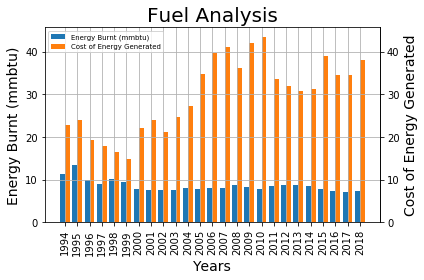

In [41]:
fresult = raw_df.groupby('report_year').mean()

# print to display
print(fresult[['fuel_mmbtu_per_unit','fuel_to_energy_cost']])

years        = raw_df['report_year'].unique()
energy_cost  = fresult['fuel_mmbtu_per_unit']
energy_burnt = fresult['fuel_to_energy_cost']
ylabel1      = 'Energy Burnt (mmbtu)'
ylabel2      = 'Cost of Energy Generated'
x_label      = 'Years'
title        = 'Fuel Analysis' 

# plot graph
draw_groupedBars(energy_cost,
                 energy_burnt,years,
                 x_label,ylabel1,ylabel2,title)


#### 5.3. Which of the fuel types cost more to convert from fuel to energy?

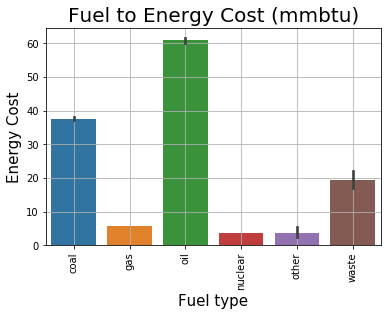

In [42]:
sns.barplot(data=raw_df,x = 'fuel_type_code_pudl', y = 'fuel_to_energy_cost')

plt.xticks(rotation=90)
plt.ylabel('Energy Cost',size=15)
plt.xlabel('Fuel type',size=15)
plt.title('Fuel to Energy Cost (mmbtu)',size=20)
plt.savefig(file_path+"\\"+'Fuel to Energy Cost (mmbtu)'+".png")
plt.grid()

plt.show()

#### 5.4. Which of the fuel type cost more to burn?

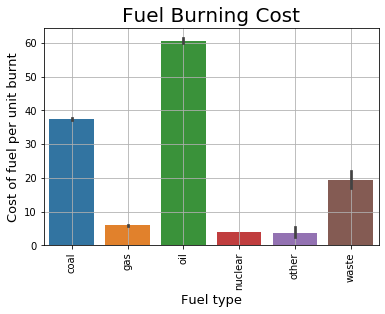

In [43]:
# chart to show the fuel type which cost most to burn
ax = sns.barplot(data=raw_df,x = 'fuel_type_code_pudl', y = 'fuel_cost_per_unit_burned')

plt.ylabel('Cost of fuel per unit burnt',size=13)
plt.xlabel('Fuel type',size=13)
plt.title('Fuel Burning Cost', size = 20)
plt.xticks(rotation=90)
plt.savefig(file_path+"\\"+'Fuel Burning Cost'+".png")
plt.grid()

plt.show()